In [20]:
# 구글 드라이브 마운트
# 처음 실행 시 인증을 요구하며, 구글 계정으로 승인해 줘야 합니다.
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flight = pd.read_csv('/content/drive/MyDrive/AICE/Clean_Dataset.csv', encoding = 'cp949')
flight.drop(flight.columns[0],axis = 1, inplace = True) # 1행 빼기
flight

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [14]:
import random
import numpy as np

random.seed(2023)
np.random.seed(2023)

flight_na = flight.copy()
for i in range(0,5000):
  flight_na.iloc[random.randint(0,300152), random.randint(0,10)] = np.nan

flight_na.iloc[1] = np.nan
flight_na.iloc[3] = np.nan

In [14]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [15]:
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [17]:
flight_na

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


In [16]:
# 결측치수 확인하기
flight_na.isnull().sum(axis = 0)

,0
airline,468
flight,464
source_city,472
departure_time,430
stops,487
arrival_time,455
destination_city,483
class,438
duration,450
days_left,430


In [3]:
flight_na = flight_na.dropna() # 결측치 하나라도 가지는 행 모두 삭제하기
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295192 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           295192 non-null  object 
 1   flight            295192 non-null  object 
 2   source_city       295192 non-null  object 
 3   departure_time    295192 non-null  object 
 4   stops             295192 non-null  object 
 5   arrival_time      295192 non-null  object 
 6   destination_city  295192 non-null  object 
 7   class             295192 non-null  object 
 8   duration          295192 non-null  float64
 9   days_left         295192 non-null  float64
 10  price             295192 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.0+ MB


In [9]:
flight_na = flight_na.dropna(how = 'all') # 모든 데이터가 결측치인 행만 삭제하기
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300151 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


In [12]:
flight_na = flight_na.drop(['stops','flight'], axis = 1) # stops와 flight 제거하기
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   source_city       299681 non-null  object 
 2   departure_time    299723 non-null  object 
 3   arrival_time      299698 non-null  object 
 4   destination_city  299670 non-null  object 
 5   class             299715 non-null  object 
 6   duration          299703 non-null  float64
 7   days_left         299723 non-null  float64
 8   price             299714 non-null  float64
dtypes: float64(3), object(6)
memory usage: 20.6+ MB


In [16]:
flight_na = flight_na.fillna(flight_na.select_dtypes(include='number').mean())
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [18]:
flight_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


In [19]:
flight_na = flight_na.fillna(method = 'bfill') # 다음 인덱스에 있는 값을 사용해서 결측치를 채움 (backfill)
flight_na.info()

/tmp/ipython-input-19-1707096508.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  flight_na = flight_na.fillna(method = 'bfill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


**이상치 처리하기**

In [21]:
flight_origin = flight.copy() # 원본 복사하기

In [22]:
outlier = flight[(abs((flight['price']-flight['price'].mean())/flight['price'].std()))>1.96].index # 신뢰도 95% 기준 이상치 Index 추출하기
outlier

Index([206691, 206692, 206693, 206694, 206695, 206696, 206697, 206698, 206699,
       206784,
       ...
       300107, 300108, 300109, 300110, 300147, 300148, 300149, 300150, 300151,
       300152],
      dtype='int64', length=12493)

In [23]:
clean_flight = flight.drop(outlier)
clean_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287660 entries, 0 to 300146
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           287660 non-null  object 
 1   flight            287660 non-null  object 
 2   source_city       287660 non-null  object 
 3   departure_time    287660 non-null  object 
 4   stops             287660 non-null  object 
 5   arrival_time      287660 non-null  object 
 6   destination_city  287660 non-null  object 
 7   class             287660 non-null  object 
 8   duration          287660 non-null  float64
 9   days_left         287660 non-null  int64  
 10  price             287660 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 26.3+ MB


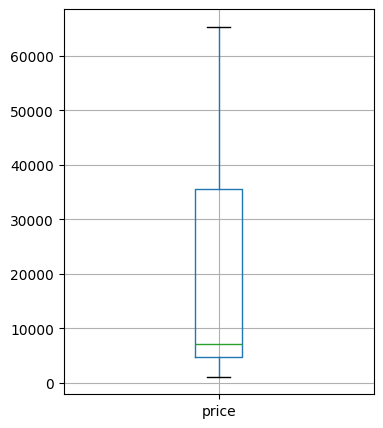

In [24]:
plt.figure(figsize = (4,5))
clean_flight[['price']].boxplot()
plt.show()

**범주형 데이터 정제하기**

In [27]:
flight = flight_origin.copy() # 원본데이터 불러오기
flight['label_encoding'] = pd.factorize(flight['airline'])[0]#.reshape(-1,1) # 레이블 인코딩하기
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2


In [28]:
print(flight['airline'].value_counts()) # airline 칼럼과
print(flight['label_encoding'].value_counts()) # 새롭게 만들어진 label_encoding 칼럼의 빈도표 확인하기

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
label_encoding
2    127859
5     80892
4     43120
3     23173
1     16098
0      9011
Name: count, dtype: int64


In [29]:
flight = flight_origin.copy()
pd.get_dummies(flight['class']) # 원핫 인코딩하기

,Business,Economy
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
300148,True,False
300149,True,False
300150,True,False
300151,True,False


In [30]:
flight = pd.get_dummies(flight, columns = ['class']) # 원핫인코딩 결과물 데이터에 반영하기
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,False,True
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,False,True
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,False,True
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,False,True
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,False,True


**스케일링하기**

In [31]:
flight = flight_origin.copy()
flight_num = flight[['duration', 'days_left', 'price']]

flight_num = (flight_num - flight_num.min())/(flight_num.max() - flight_num.min()) # 정규화하기
flight_num.head()

,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765


In [32]:
flight_num.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,0.232470,0.520932,0.162215
std,0.146775,0.282521,0.186099
min,0.000000,0.000000,0.000000
25%,0.122449,0.291667,0.030156
50%,0.212653,0.520833,0.051818
75%,0.313061,0.770833,0.339570
max,1.000000,1.000000,1.000000


In [33]:
flight_num = flight[['duration', 'days_left', 'price']]
flight_num = (flight_num - flight_num.mean()) / flight_num.std() # 표준화하기
flight_num.head()

,duration,days_left,price
0,-1.397528,-1.843872,-0.658067
1,-1.375282,-1.843872,-0.658067
2,-1.397528,-1.843872,-0.657935
3,-1.386405,-1.843872,-0.657979
4,-1.375282,-1.843872,-0.657979


In [34]:
flight_num.describe()

,duration,days_left,price
count,3.001530e+05,3.001530e+05,3.001530e+05
mean,9.090311e-17,1.810487e-16,-1.939266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.583847e+00,-1.843872e+00,-8.716567e-01
25%,-7.495861e-01,-8.114997e-01,-7.096143e-01
50%,-1.350141e-01,-3.503362e-04,-5.932152e-01
75%,5.490796e-01,8.845399e-01,9.530162e-01
max,5.229282e+00,1.695689e+00,4.501823e+00


In [36]:
flight = flight.drop(['duration','days_left', 'price'], axis = 1) # 칼럼 삭제하기
flight = pd.concat([flight, flight_num], axis = 1) # 칼럼 붙이기
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979
